<h1>  TP4 : Analyse en composantes Principales</h1>

<h1>Etape 1 : importation et nettoyage des données</h1>

In [1]:
# a) Importer la bibliothèque « pandas »
import pandas as pd

In [2]:
# b) Charger le fichier « «notes-etudiants.csv » dans un dataframe « df »
df=pd.read_csv('notes-etudiants.csv')

In [3]:
# c) Dégager le nombre d'individus ainsi que le nombre de variables
print(df.shape) #(nombre d'individue , nombre de variables)
print(" Nombre des Individus :",df.shape[0])
print(" Nombre des Variables :",df.shape[1])

(12, 4)
 Nombre des Individus : 12
 Nombre des Variables : 4


<h1>Le Pre-Processing : Données Manquantes & Nettoyage</h1>

<h2>Detection des Données Manquante</h2>

In [4]:
# d) Tester s’il y a des valeurs manquantes
print(df.isnull().values.any())

True


In [5]:
# e) Afficher le nombre de valeurs manquantes par variable
df.isnull().sum()

Statistique           0
Math                  0
Comptabilite          3
Gestion Financiere    0
dtype: int64

<h2>Le Pre-Processing : Données Manquantes & Nettoyage</h2>

In [6]:
# f) Copier le dataframe « df » dans un nouveau nommé « df1 »
df1 = df.copy()
df1

,Statistique,Math,Comptabilite,Gestion Financiere
Ind1,19,14,8.0,18
Ind1,20,12,4.0,4
Ind3,10,10,32.0,38
Ind4,13,17,NaN,4
Ind5,6,8,26.0,24
Ind6,6,3,28.0,32
Ind7,19,16,NaN,20
Ind8,15,18,6.0,6
Ind9,9,2,31.0,30
Ind10,8,7,20.0,20


<h2>Nettoyage des Données</h2>

In [7]:
#g) S’il y a des valeurs manquantes dans « df1 »,procéder pour le nettoyage, par un remplacement par la valeur la plus utilisée
print(df1['Comptabilite'].mode())

0    8.0
Name: Comptabilite, dtype: float64


In [8]:
df1['Comptabilite'].fillna(8.0,inplace=True) # mode non fonctionnelle 
df1

,Statistique,Math,Comptabilite,Gestion Financiere
Ind1,19,14,8.0,18
Ind1,20,12,4.0,4
Ind3,10,10,32.0,38
Ind4,13,17,8.0,4
Ind5,6,8,26.0,24
Ind6,6,3,28.0,32
Ind7,19,16,8.0,20
Ind8,15,18,6.0,6
Ind9,9,2,31.0,30
Ind10,8,7,20.0,20


In [9]:
df1.isnull().sum()

Statistique           0
Math                  0
Comptabilite          0
Gestion Financiere    0
dtype: int64

<h1>Etape 2 : corrélation entre les variables</h1>

In [10]:
# h) Créer la matrice de corrélation pour voir l’inter-liaison entre les variables
CorrMatrix=df1.corr()
CorrMatrix

,Statistique,Math,Comptabilite,Gestion Financiere
Statistique,1.000000,0.703085,-0.860356,-0.691173
Math,0.703085,1.000000,-0.822843,-0.683630
Comptabilite,-0.860356,-0.822843,1.000000,0.902431
Gestion Financiere,-0.691173,-0.683630,0.902431,1.000000


<h3> i) Que Constatez-Vous ? 
    
   => Constatation : En examinant cette matrice on constate que nous avons 2 groupes de Variables :
        
Les matiéres dites "Scientifique"(Statistiques et Mathématiques)
Les matiéres dites de "Gestion"(Comptabilité & Gestion Financiére)

Les matiéres scientifique sont fortement corrélées positivement entre elles r(Stat,Math)=0,703085
de méme pour les matiéres de gestion r(Comp,GF)=0,902431

alors que entre ces deux groupes les corrélations sont fortement négatives.
 Exemple r(Math,Comp)=-0,822843

Cela signifie qu'un étudiant "bon" en Statistique le sera également en Mathématiques.
Mais en revanche il sera "Mauvaise" en Comptabilité et en Gestion Financiére <h3/>

<h3>Représentation graphique de la corrélation entre les variables</h3>

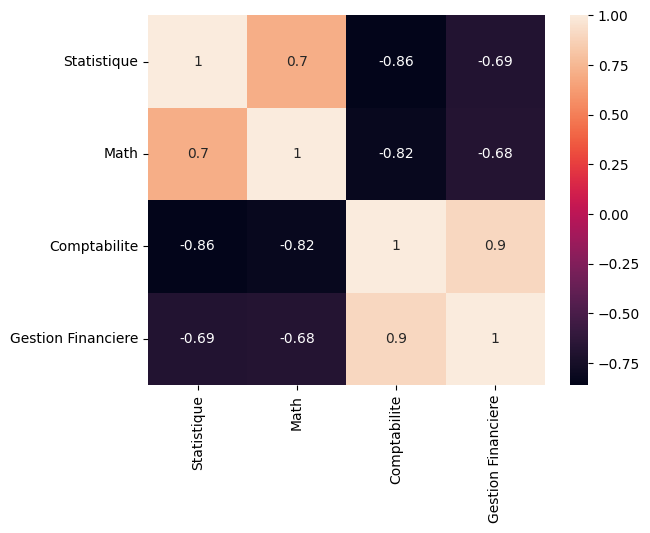

In [12]:
# j) En utilisant la bibliothèque «seaborn »,Représenter graphiquement la corrélation entre les variables.
import seaborn as sns 
from matplotlib import pyplot as plt 
sns.heatmap(CorrMatrix,annot=True)
plt.show()

<h1>Etape 3 : Réaliser une ACP</h1>

<h3>
    Données Centrées Reduites 
    
les variables Statistique et Mathématiques sont notées sur 20 alors Comptabilité & Gestion Financiére sont notées sur 40.
La seul maniére pour rendre ses données"homogeneous", c'est de les centrer et de les reduire 

Une Matrice Centrée Reduite est une matrice dont :
1. La Moyenne des valeurs de chaque variable = 0
2. L'Ecart Type des valeurs de chaque variable = 1</h3>

In [ ]:
# k) Normaliser vos données.
#sklearn : pour le machine learning 
from sklearn import preprocessing 
#fit_transform appliquer la transformations sur la dataframe 
X=preprocessing.StandardScaler().fit_transform(df1)
print(X) #X est matrice centrée réduite 

[[ 1.01327759  0.60404045 -0.72776715  0.07103104]
 [ 1.20034422  0.20134682 -1.11164433 -1.12229044]
 [-0.6703221  -0.20134682  1.57549592  1.77577601]
 [-0.1091222   1.2080809  -0.72776715 -1.12229044]
 [-1.41858862 -0.60404045  0.99968015  0.58245453]
 [-1.41858862 -1.61077453  1.19161874  1.26435252]
 [ 1.01327759  1.00673408 -0.72776715  0.24150554]
 [ 0.26501106  1.40942772 -0.91970574 -0.95181594]
 [-0.85738873 -1.81212135  1.47952663  1.09387802]
 [-1.04445536 -0.80538727  0.42386439  0.24150554]
 [ 1.20034422  0.40269363 -0.72776715 -1.12229044]
 [ 0.82621096  0.20134682 -0.72776715 -0.95181594]]


In [ ]:
#Vérifier la moyenne des colonnes La Moyenne des valeurs de chaque variable = 0
import numpy as np 
print('Moyenne')
print(np.mean(X,axis=0))
#vérifier l'ecart type des colonnes L'Ecart Type des valeurs de chaque variable = 1
print('Ecart-Type')
print(np.std(X,axis=0))

Moyenne
[-1.29526020e-16  6.93889390e-18 -7.40148683e-17 -1.20274161e-16]
Ecart-Type
[1. 1. 1. 1.]


In [ ]:
#l) Calcul les composantes principales
from sklearn import decomposition 
mypca = decomposition.PCA(n_components=4)# un paramétre ici pour 4 composantes 
#fit_transform is used to calculate the PCAs from training data 
data_sortie=mypca.fit_transform(X)
data_axe=pd.DataFrame(data_sortie,index=df1.index,columns=['PC'+str(i+1) for i in range(4)])
data_axe

,PC1,PC2,PC3,PC4
Ind1,-1.140795,0.596779,-0.466785,-0.225480
Ind1,-1.832654,-0.517569,-0.590093,-0.044127
Ind3,2.145385,1.196202,0.043011,0.300026
Ind4,-1.470490,-0.185867,1.028427,0.077460
Ind5,1.806416,-0.196848,0.641662,0.047491
Ind6,2.728399,-0.307763,-0.098172,-0.277518
Ind7,-1.250142,0.970907,-0.268556,-0.224893
Ind8,-1.768993,0.135648,0.812842,-0.008944
Ind9,2.622361,-0.364268,-0.606958,0.163093
Ind10,1.242869,-0.549471,0.294842,-0.209638


In [ ]:
print('EigenVector:')
print(mypca.components_) #vecteurs propres

EigenVector:
[[-0.48773095 -0.4798726   0.53819628  0.49212353]
 [ 0.26869212  0.62456876  0.14267869  0.71927825]
 [-0.77703127  0.58741783  0.02513642 -0.22479073]
 [ 0.2935055   0.18594743  0.83027448 -0.43580082]]


<h2>F1 est une combinaison linéaire des autres variables. Vérifions le pour l'individu ind1 :</h2>

In [ ]:
# m) Vérifier que les composantes principales sont en fait des combinaisons linaires des variables initiales.
#-0.48773095 -0.4798726   0.53819628  0.49212353 vecteurs propres 
# 1.01327759  0.60404045 -0.72776715  0.07103104 ind1 matrice centrée et réduite 
PC1 =1.01327759*(-0.48773095)+0.60404045*(-0.4798726)-0.72776715*(0.53819628)+0.07103104*(0.49212353)
print(PC1)

-1.1407948295229113


In [ ]:
#look at wich variables account for the most variability in the data 
print("Pourcentage de variance explique par chaque composante :")
print(mypca.explained_variance_ratio_) #return the variance caused by each of the 

Pourcentage de variance explique par chaque composante :
[0.83463295 0.08180052 0.0740908  0.00947573]


In [ ]:
print(mypca.explained_variance_ratio_*100)

[83.46329459  8.18005207  7.40907996  0.94757338]


<h3>La premiére composante accapare 83.46% de l'information disponible. Nous disposons de 91.64% avec les deux premiers facteurs.
Avec 3 composantes nous avons 99.04.La derniére semble anecdotique
On remarque que la premiere composantes 83.46% information ou variance</h3>

<h3><u>REMARQUE</u> pour atteindre l'objectif de l'ACP il est necessaire qu'avec 1 , 2 ou au maximum 3 axes principaux
en puisssent expliquée une part significative de la variance totale de nuage  (70 a 80% par exemple )
cela revient donc a maximiser la variance d'une composante principale PCi quelqonque</h3>

Text(0.5, 1.0, 'Scree Plot')

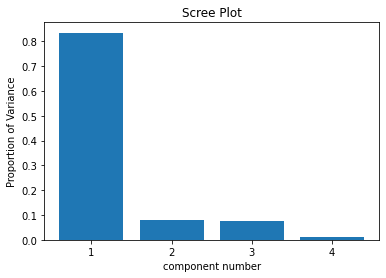

In [ ]:
plt.bar(np.arange(1,5), mypca.explained_variance_ratio_)
plt.xticks(np.arange(1,5))#set label location
plt.xlabel("component number")
plt.ylabel("Proportion of Variance")
plt.title("Scree Plot")

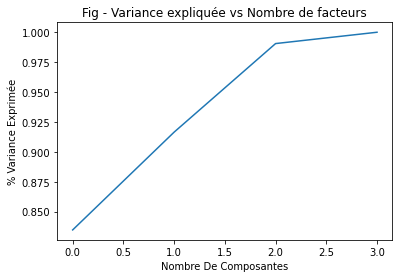

In [ ]:
#Variation Composantes-Variances 
plt.plot(np.cumsum(mypca.explained_variance_ratio_))
plt.title("Fig - Variance expliquée vs Nombre de facteurs")
plt.xlabel("Nombre De Composantes")
plt.ylabel("% Variance Exprimée")
plt.show()

In [ ]:
s=mypca.singular_values_
print(s) #valeurs de variance

[6.32948508 1.98152088 1.88583095 0.67441472]


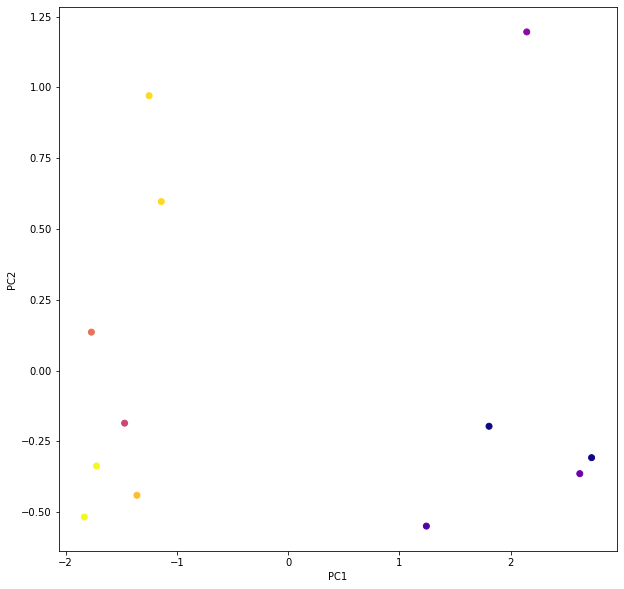

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(data_sortie[:,0],data_sortie[:,1],c=df.get('Statistique'),cmap='plasma')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
# Bruit estimé lié a la covariance
print(mypca.noise_variance_)

0.0
